In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from scripts.pdf_parser_class import PDFparser

In [3]:
def make_pdf_image(file_path, parse_method):
    
    parser = PDFparser(parse_method=parse_method)
    df_marked = parser.get_rows_marked(file_path)
    
    mrgn = 50
    font_scale = .35
    thickness = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    line_type = cv2.LINE_AA
    
    longest_str = df_marked.loc[df_marked[0].str.len().idxmax()][0]    

    (w, h), baseline = cv2.getTextSize(longest_str,
                                       font,
                                       font_scale,
                                       thickness)
    
    line_height = h + baseline

    image = np.zeros((len(df_marked) * line_height + mrgn * 2,
                      w + mrgn * 2,
                      3), dtype="uint8")

    x, y0 = (mrgn, mrgn)
    for i in range(len(df_marked)):
        line = df_marked.loc[i, 0]
        y = y0 + i * line_height
        if df_marked.loc[i, "mark"] == "tbl_row":
            cv2.putText(image,
                        line,
                        (x, y),
                        font,
                        font_scale,
                        (255, 0, 0),
                        thickness,
                        line_type)
        elif df_marked.loc[i, "mark"] == "tbl_hdr":
            cv2.putText(image,
                        line,
                        (x, y),
                        font,
                        font_scale,
                        (255, 255, 0),
                        thickness,
                        line_type)
        else:
            cv2.putText(image,
                        line,
                        (x, y),
                        font,
                        font_scale,
                        (255, 255, 255),
                        thickness,
                        line_type)
    return image

In [4]:
pdf_pths = [str(pth) for pth
            in Path("../../task_description/examples/").iterdir()
            if pth.suffix == ".pdf"]

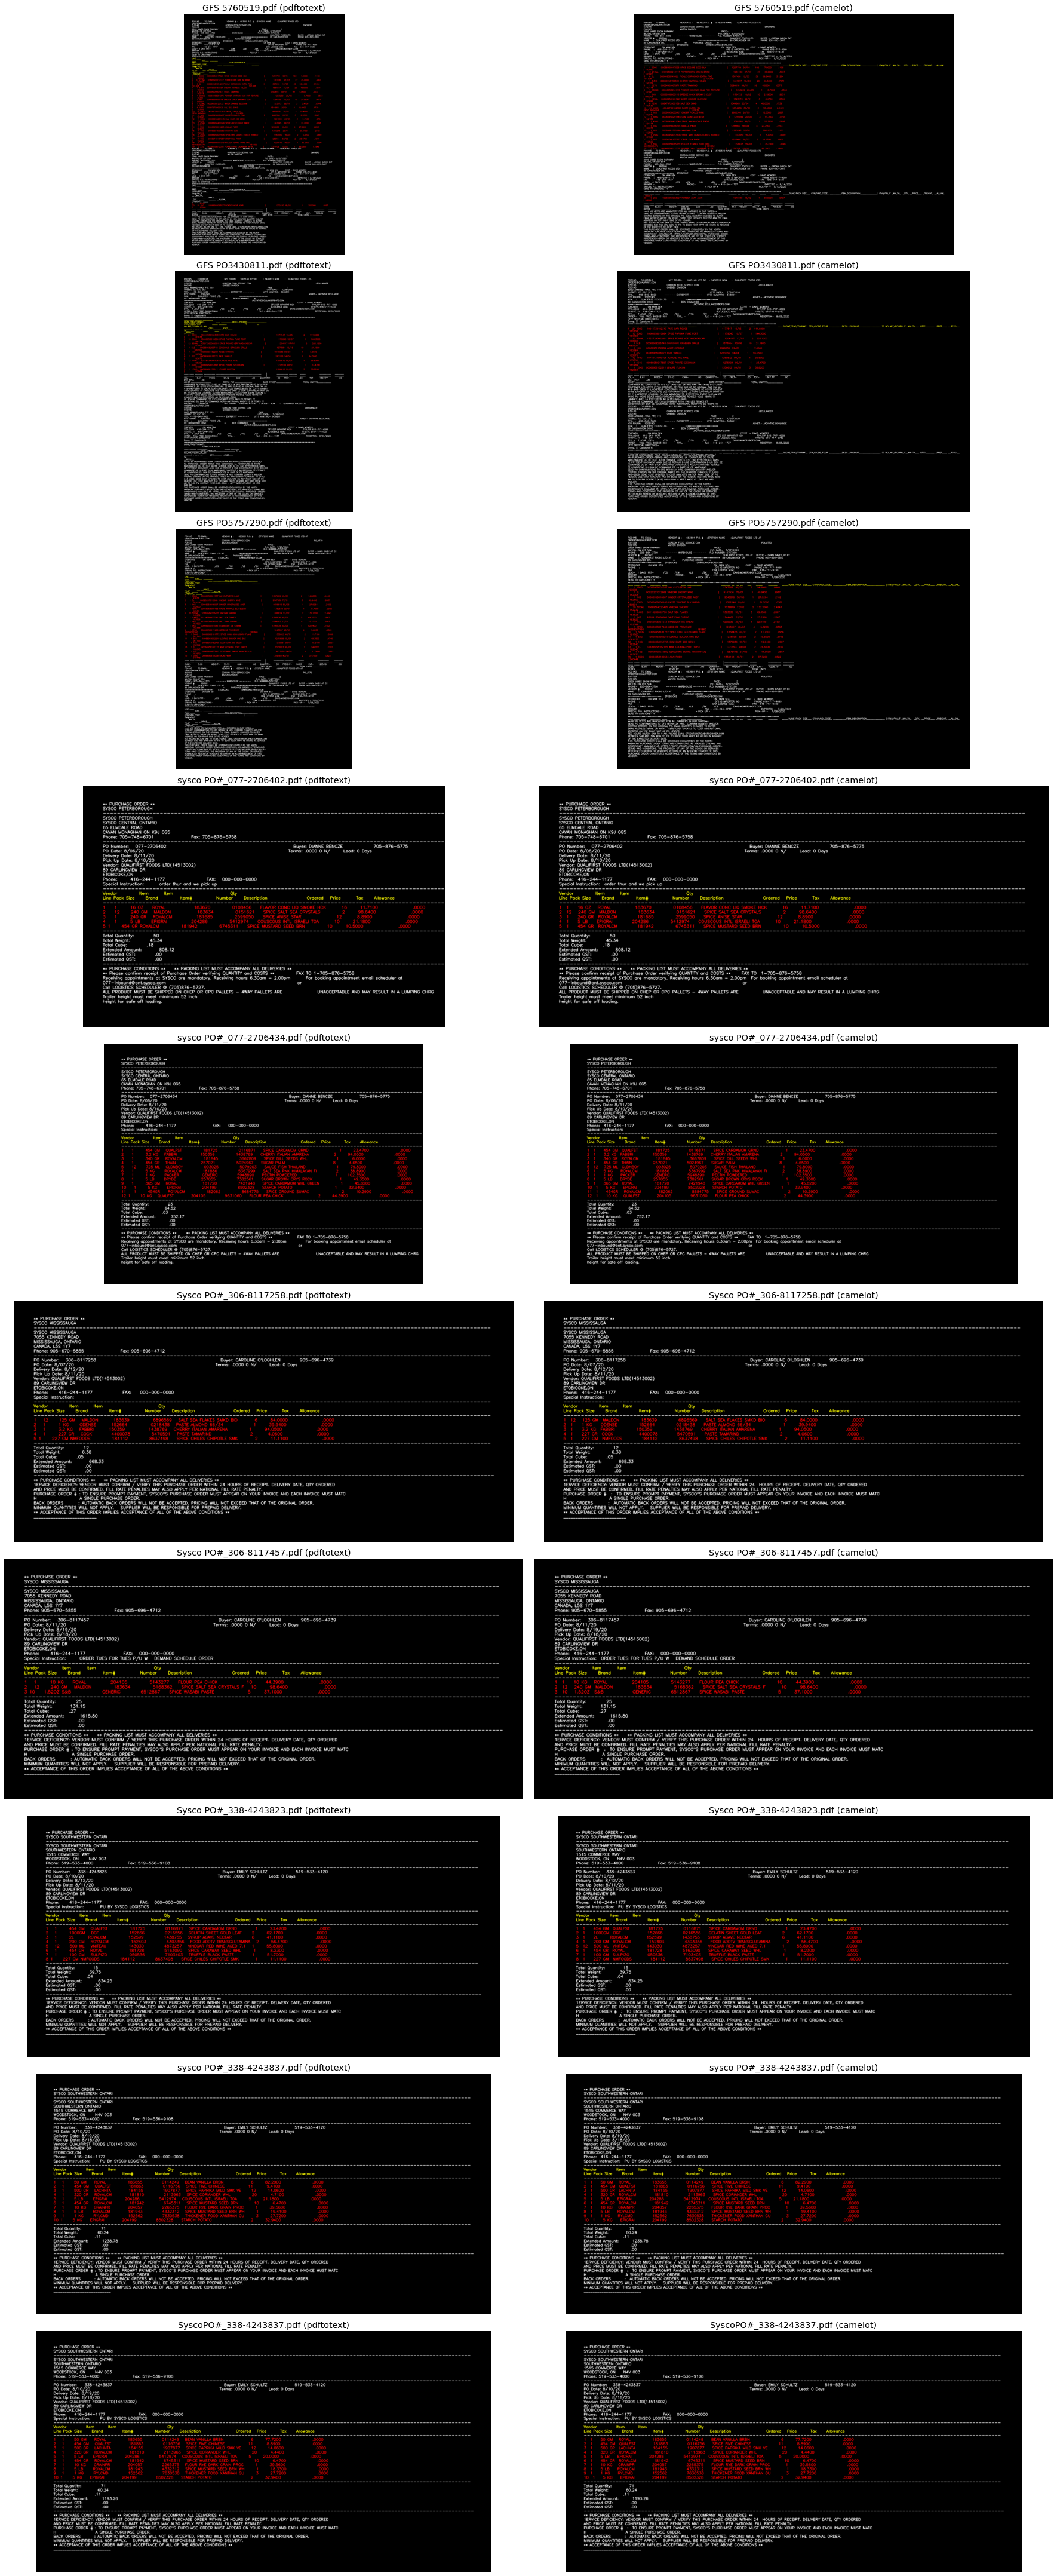

In [13]:
parse_mtds = ["pdftotext", "camelot"]

params = {"axes.titlesize": "X-large"}
plt.rcParams.update(params)

fig, ax = plt.subplots(len(pdf_pths), len(parse_mtds),
                      figsize=(25, 60))

for i in range(len(pdf_pths)):
    for j in range(len(parse_mtds)):
        ax[i, j].axis("off")
        ax[i, j].title.set_text(os.path.basename(pdf_pths[i]) +
                                " (" + parse_mtds[j] + ")"  )
        ax[i, j].imshow(make_pdf_image(pdf_pths[i], parse_mtds[j]))
        fig.tight_layout()